# Data Analysis and Visualization in Python
## Indexing, Slicing and Subsetting DataFrames in Python
Questions
* How can I access specific data within my data set?
* How can I manage undefined (null) values?
* How can I save a dataframe to a file?

Objectives
* Employ slicing to select sets of data from a DataFrame.
* Employ label and integer-based indexing to select ranges of data in a dataframe.
* Reassign values within subsets of a DataFrame.
* Create a copy of a DataFrame.
* Query/select a subset of data using a set of criteria using the following operators: `=`, `!=`, `>`, `<`, `>=`, `<=`.
* Manipulate data using boolean masks.
* Transform or remove null values.
* Write modified data to a CSV file.

## Loading our data

In [2]:
# First make sure pandas is loaded
import pandas as pd

# Read in the survey csv
surveys_df = pd.read_csv("data/surveys.csv")

## Indexing & Slicing in Python
### Selecting Data Using Labels (Column Headings)

In [3]:
surveys_df['species_id']

0         NL
1         NL
2         DM
3         DM
4         DM
        ... 
35544     AH
35545     AH
35546     RM
35547     DO
35548    NaN
Name: species_id, Length: 35549, dtype: object

In [4]:
surveys_species = surveys_df['species_id']
surveys_species.shape

(35549,)

In [6]:
# Select two columns with a list of column names
surveys_df[ ['species_id', 'plot_id' ]]

,species_id,plot_id
0,NL,2
1,NL,3
2,DM,2
3,DM,7
4,DM,3
...,...,...
35544,AH,15
35545,AH,15
35546,RM,10
35547,DO,7


### Slicing Subsets of Rows and Columns in Python
We can select specific ranges of our data in both the row and column directions using `loc`: primarily label based indexing. Integers may be used but they are interpreted as a label

In [7]:
# What does this do?
surveys_df.loc[0, ['species_id', 'plot_id', 'weight']]

species_id     NL
plot_id         2
weight        NaN
Name: 0, dtype: object

In [11]:
# Select all columns for rows of index values 0 and 10
surveys_df.loc[[0,10], :]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
10,11,7,16,1977,5,DS,F,53.0,NaN


In [12]:
# What happens when you type the code below?
surveys_df.loc[[0, 10, 35548], :]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
10,11,7,16,1977,5,DS,F,53.0,NaN
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


### Exercise - Range
What happens when you execute:

In [13]:
surveys_df.loc[0:4,'month':'plot_id'] # 'month':'plot_id'

,month,day,year,plot_id
0,7,16,1977,2
1,7,16,1977,3
2,7,16,1977,2
3,7,16,1977,7
4,7,16,1977,3


## Subsetting Data Using Criteria

In [15]:
surveys_df[surveys_df['year'] == 2002]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
33320,33321,1,12,2002,1,DM,M,38.0,44.0
33321,33322,1,12,2002,1,DO,M,37.0,58.0
33322,33323,1,12,2002,1,PB,M,28.0,45.0
33323,33324,1,12,2002,1,AB,NaN,NaN,NaN
33324,33325,1,12,2002,1,DO,M,35.0,29.0
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [16]:
surveys_df[surveys_df['year'] != 2002]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
33315,33316,12,16,2001,11,NaN,NaN,NaN,NaN
33316,33317,12,16,2001,13,NaN,NaN,NaN,NaN
33317,33318,12,16,2001,14,NaN,NaN,NaN,NaN
33318,33319,12,16,2001,15,NaN,NaN,NaN,NaN


In [ ]:
surveys_df['year'] !=  ###

In [ ]:
surveys_df[surveys_df['year'] ### ###]

In [17]:
surveys_df[(surveys_df['year'] >= 2001) & (surveys_df['weight'] <= 8)]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
31802,31803,3,3,2001,17,RM,M,16.0,8.0
31890,31891,3,25,2001,4,PF,M,17.0,8.0
31983,31984,4,21,2001,22,PF,F,15.0,7.0
32019,32020,4,22,2001,14,PF,F,15.0,7.0
32091,32092,5,27,2001,4,PF,M,16.0,8.0
32147,32148,5,27,2001,15,PF,F,16.0,8.0
32183,32184,6,25,2001,18,PF,F,15.0,7.0
32217,32218,6,25,2001,20,PF,F,16.0,8.0
32224,32225,6,25,2001,23,PF,M,16.0,7.0
32496,32497,8,26,2001,4,PF,F,16.0,8.0


Here are the most common operators for conditions:

* Equal, not equal: `==`, `!=`
* Greater than, less than: `>` or `<`
* Greater than or equal to, less than or equal to: `>=`, `<=`
* Element-wise AND and OR operators: `&` and `|`

### Exercises - Selection by presence
`1`. You can use the `isin` method in python to query a DataFrame based upon a list of values as follows:
```
surveys_df[surveys_df['column_name'].isin([value1, value2, ...])]
```
Use the `isin` method to find all different sites (`plot_id`) that contain particular species (`AS`, `CQ`, `OX` and `UL`) in the surveys DataFrame.

In [20]:
surveys_df[surveys_df['species_id'].isin(['AS','CQ','OX','UL'])]['plot_id'].unique()

array([ 3, 21,  5, 12,  2, 19, 20, 23, 16, 22, 14, 17, 13,  8])

In [21]:
surveys_df[surveys_df['species_id'].isin(['AS','CQ'])]['plot_id'].unique()

array([19, 20, 23,  5, 16, 22,  2,  3, 12])

`2`. Create a new DataFrame that contains only observations that are of sex female or male and where weight values are greater than 0. Create a stacked bar plot of average weight by site with male vs female values stacked for each site.

In [27]:
# Selection of the data with isin()
selection = surveys_df[(surveys_df['sex'].isin(["F", "M"])) & 
                       (surveys_df['weight'] > 0)][['weight','plot_id','sex']]
selection.head()

,weight,plot_id,sex
62,40.0,3,M
63,48.0,7,M
64,29.0,4,F
65,46.0,4,F
66,36.0,7,M


In [28]:
# Calculate the mean weight for each plot_id and sex combination: 
selection = selection.groupby(['plot_id', 'sex']).mean().unstack()
selection.head()

weight           
sex              F          M
plot_id                      
1        46.311138  55.950560
2        52.561845  51.391382
3        31.215349  34.163241
4        46.818824  48.888119
5        40.974806  40.708551

In [29]:
# The legend header contains two levels. In order to remove this,
# the column naming needs to be reduced by one level : 
selection.columns = selection.columns.droplevel()
selection.head() , selection.shape

(sex              F          M
 plot_id                      
 1        46.311138  55.950560
 2        52.561845  51.391382
 3        31.215349  34.163241
 4        46.818824  48.888119
 5        40.974806  40.708551,
 (24, 2))

<AxesSubplot:xlabel='plot_id'>

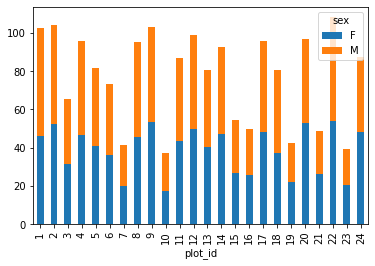

In [30]:
# And we can make a stacked bar plot from this:
selection.plot(kind='bar', stacked=True)

`3`. The `~` symbol in Python can be used to return the OPPOSITE of the selection that you specify in python. It is equivalent to **is not in**. Write a query that selects all rows that are NOT equal to `F` or `M` in the surveys data.

In [ ]:
surveys_df[surveys_df['sex'].insin(["F", "M"])]

## Selecting and cleaning undefined values

In [31]:
pd.isnull(surveys_df)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
35544,False,False,False,False,False,False,True,True,True
35545,False,False,False,False,False,False,True,True,True
35546,False,False,False,False,False,False,False,False,False
35547,False,False,False,False,False,False,False,False,False


In [33]:
# To select rows with at least one undefined value, we can use the .any() method
surveys_df[pd.isnull(surveys_df).any(axis=1)]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35530,35531,12,31,2002,13,PB,F,27.0,NaN
35543,35544,12,31,2002,15,US,NaN,NaN,NaN
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN


In [35]:
# What does this do?
one_selection = surveys_df[pd.isnull(surveys_df['weight'])]
one_selection.groupby('species_id')['record_id'].count()

species_id
AB    303
AH    437
AS      2
BA      1
CB     50
CM     13
CQ     16
CS      1
CT      1
CU      1
CV      1
DM    334
DO    123
DS    160
DX     40
NL    100
OL     36
OT     89
OX      6
PB     81
PC     39
PE     39
PF     49
PG      8
PH      1
PI      1
PM     23
PP     99
PU      5
PX      4
RM     74
SA     75
SC      1
SF      2
SH      6
SO      2
SS    246
ST      1
SU      5
UL      4
UP      8
UR     10
US      4
ZL      2
Name: record_id, dtype: int64

### Getting Rid of the NaN’s

In [36]:
# Before the cleanup
print(surveys_df['weight'].count(), surveys_df['weight'].mean())

32283 42.672428212991356


In [37]:
# Create a copy to avoid modifying the original object
copy_surveys_df = surveys_df.copy()

In [38]:
# For a stable mean value
averageW = copy_surveys_df['weight'].mean()
copy_surveys_df['weight'] = copy_surveys_df['weight'].fillna(averageW)

In [39]:
# After the cleanup
print(copy_surveys_df['weight'].count(), copy_surveys_df['weight'].mean())

35549 42.672428212991356


In [40]:
copy_surveys_df0 = surveys_df.copy()
# For a stable mean value
averageW0 = copy_surveys_df0['weight'].mean()
copy_surveys_df0['weight'] = copy_surveys_df0['weight'].fillna(0)

In [41]:
print(copy_surveys_df0['weight'].count(), copy_surveys_df0['weight'].mean())

35549 38.751976145601844


### Writing Out Data to CSV

In [42]:
# Only keep (complete) records that have no NA
df_no_na = surveys_df.dropna()
df_no_na

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
62,63,8,19,1977,3,DM,M,35.0,40.0
63,64,8,19,1977,7,DM,M,37.0,48.0
64,65,8,19,1977,4,DM,F,34.0,29.0
65,66,8,19,1977,4,DM,F,35.0,46.0
66,67,8,19,1977,7,DM,M,35.0,36.0
...,...,...,...,...,...,...,...,...,...
35540,35541,12,31,2002,15,PB,F,24.0,31.0
35541,35542,12,31,2002,15,PB,F,26.0,29.0
35542,35543,12,31,2002,15,PB,F,27.0,34.0
35546,35547,12,31,2002,10,RM,F,15.0,14.0


In [44]:
df_no_na.to_csv('surveys_complete.csv', index=False)